In [2]:
import rasterio as ras
import numpy as np
from rasterio.plot import show

In [3]:
imgs2015 = ras.open("LandUse/2005_Final_Final.tif")
imgs2017 = ras.open("LandUse/2017_Final_Final.tif")

In [4]:
print(imgs2015.name)
print(imgs2017.name)

LandUse/2005_Final_Final.tif
LandUse/2017_Final_Final.tif


In [5]:
print(imgs2015.shape)
print(imgs2017.shape)

(1580, 2114)
(1564, 2095)


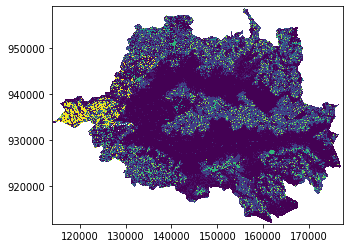

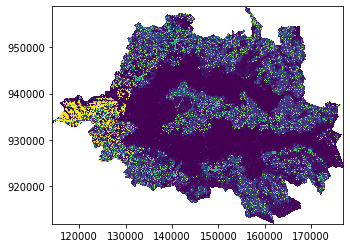

In [7]:
show(imgs2015)
show(imgs2017)

In [8]:
img_2015 = imgs2015.read()[:,0:1564, 0:2095]
img_2017 = imgs2017.read()

forest_mask2015 = (img_2015 == 11)
buffer_mask2015 = (img_2015 == 128)
non_forest_mask2015 = ~ (forest_mask2015 | buffer_mask2015)

In [9]:
forest_mask2017 = (img_2017 == 11)
buffer_mask2017 = (img_2017 == 128)
non_forest_mask2017 = ~ (forest_mask2017 | buffer_mask2017)

In [10]:
print(img_2015.shape)
print(img_2017.shape)

(1, 1564, 2095)
(1, 1564, 2095)



True values are in Yellow 



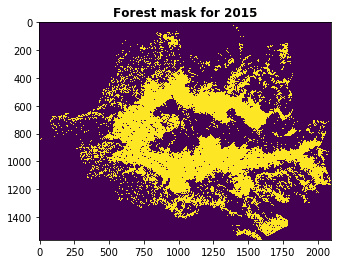

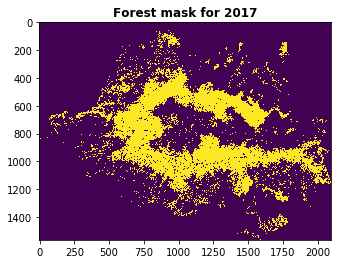

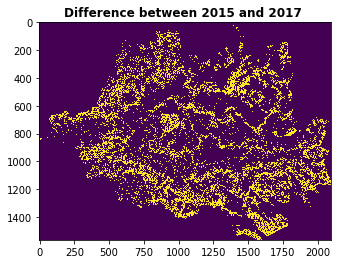

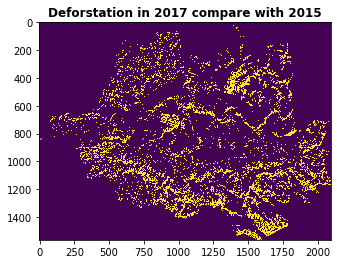

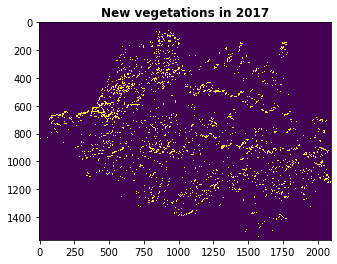

In [20]:
# Forest mask
print("\nTrue values are in Yellow \n")

show(forest_mask2015, title="Forest mask for 2015")

show(forest_mask2017, title="Forest mask for 2017")

diff_forest = forest_mask2015 ^ forest_mask2017
diff_2015y = forest_mask2015 & (~forest_mask2017)
diff_2017y = (~forest_mask2015) & forest_mask2017

# There is a difference in value in these areas
title = "Difference between 2015 and 2017 "
show(diff_forest, title=title)

# there was a deforstation in these areas when we compare the 2015 and 2017 
title = "Deforstation in 2017 compare with 2015"
show(diff_2015y, title=title)

# new vegetations were planted in 2017 in these areas 
title = "New vegetations in 2017"
show(diff_2017y, title=title)

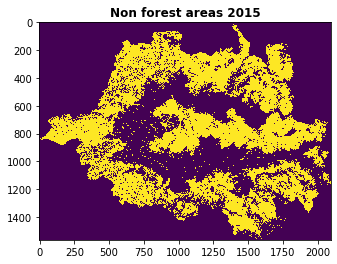

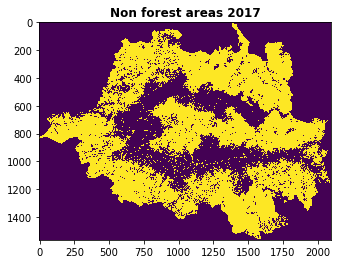

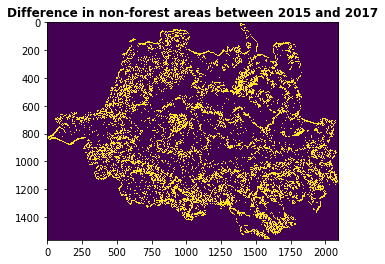

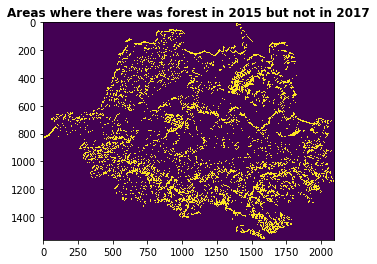

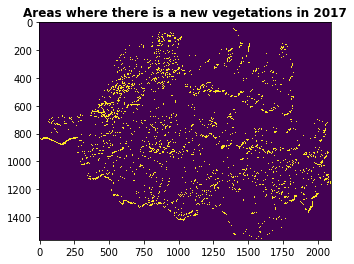

In [44]:
# Non Forest mask
title = "Non forest areas 2015"
show(non_forest_mask2015, title=title)
title = "Non forest areas 2017"
show(non_forest_mask2017, title=title)

diff_non = non_forest_mask2015 ^ non_forest_mask2017
diff_non2017y = (~non_forest_mask2015) & non_forest_mask2017
diff_non2015y =  non_forest_mask2015 & (~non_forest_mask2017)

title="Difference in non-forest areas between 2015 and 2017"
show(diff_non, title=title)
title="Areas where there was forest in 2015 but not in 2017"
show(diff_non2017y, title=title)
title="Areas where there is a new vegetations in 2017"
show(diff_non2015y, title=title)

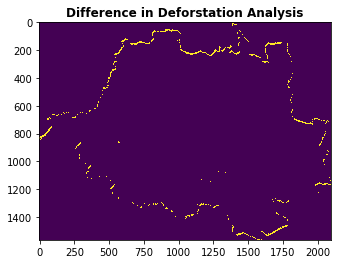

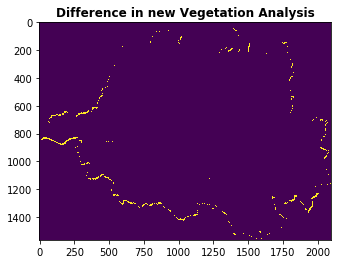

In [48]:
# comparing information gathered from forest and non-forest analysis 
diff_deforstation = diff_2015y ^ diff_non2017y
diff_vegetation = diff_2017y ^ diff_non2015y
show(diff_deforstation, title="Difference in Deforstation Analysis")
show(diff_vegetation, title="Difference in new Vegetation Analysis")

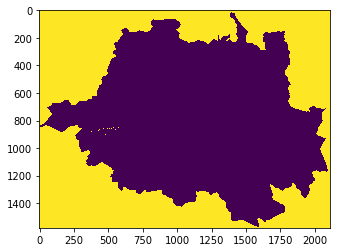

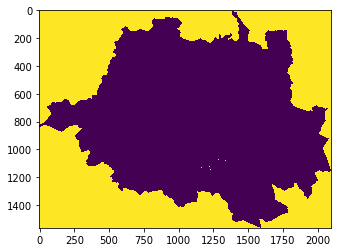

In [105]:
# The region outside 
show(buffer_mask2015)
show(buffer_mask2017)